In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import   CountVectorizer
from sklearn import metrics

import scikitplot as skplt


import sys
sys.path.append('../../data/')
import cleaner as dc

In [7]:
df = pd.read_csv('data/persuasion_dataset.csv') 
df.shape

(13114, 2)

In [8]:
# Lower case
df['ad']= df['ad'].apply(lambda x: x.lower())

# Removing punctuations
df['ad']= df['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df['ad']= df['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df['ad']= df['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df['ad']= df['ad'].apply(dc.denoise_text)

#Remove stopwords 
df['ad']= df['ad'].apply(dc.remove_stopwords)

#Remove special characters
df['ad']= df['ad'].apply(dc.remove_special_characters)

#Simple stemming 
df['lemmatized']= df['ad'].apply(dc.simple_lemmatizer)

In [9]:
X_train, X_test,  y_train, y_test= train_test_split(df['lemmatized'], df['label'], test_size =0.2, random_state=42)

In [11]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [12]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_tf, y_train)

RandomForestClassifier()

accuracy:   0.910
                precision    recall  f1-score   support

non persuasive       0.94      0.87      0.91      1314
    persuasive       0.88      0.95      0.91      1309

      accuracy                           0.91      2623
     macro avg       0.91      0.91      0.91      2623
  weighted avg       0.91      0.91      0.91      2623

confusion matrix:
[[1147  167]
 [  70 1239]]



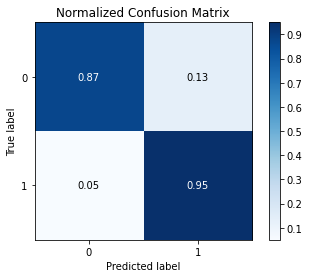

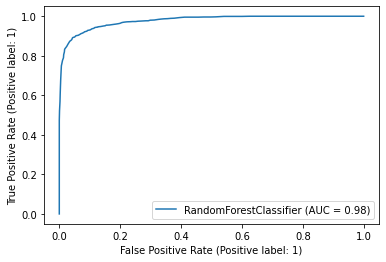

In [13]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['non persuasive', 'persuasive']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [16]:
df_val = pd.read_csv('data/sample_persuasion.csv')

# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_val['ad']= df_val['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df_val['ad']= df_val['ad'].apply(dc.denoise_text)

#Remove stopwords
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

#Remove special characters
df_val['ad']= df_val['ad'].apply(dc.remove_special_characters)

#Simple stemming 
df_val['lemmatized']= df_val['ad'].apply(dc.simple_lemmatizer)


accuracy:   0.818
                precision    recall  f1-score   support

non persuasive       0.87      0.43      0.58        92
    persuasive       0.81      0.97      0.88       227

      accuracy                           0.82       319
     macro avg       0.84      0.70      0.73       319
  weighted avg       0.83      0.82      0.80       319

confusion matrix:
[[ 40  52]
 [  6 221]]



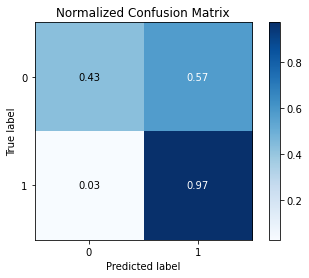

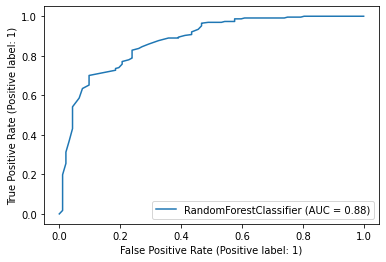

In [17]:
X_val = tf_vectorizer.transform(df_val['lemmatized'])
y_val = df_val['label']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'non persuasive', 'persuasive']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)